# TMCS Chemical Informatics Workshop 1

## Modelling

This notebook will detail the modelling processes for Workshop 1

#### Initialisations

Load in a few libraries that I know I'm definitely going to use

In [2]:
%load_ext autoreload
%autoreload 2
### The autoreload function means that every time you re-import a library it does it from scratch.
### This is useful when you are editing a library on the fly
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data Loading

In [3]:
soldata = pd.read_csv('../data/processed/processed_data.csv')
soldata.head()

,Unnamed: 0,CAS #,Formula,Mol Weight,Chemical Name,Solubility S/ (mg/L),LogP,Melting Point / C,SMILES,LogS,Melting Point / K
0,0,000055-91-4,C6H14FO3P,184.15,ISOFLUROPHATE,15400.0,1.13,-82.0,O=P(F)(OC(C)C)OC(C)C,9.642123,191.0
1,1,000056-23-5,CCl4,153.82,CARBON TETRACHLORIDE,793.0,2.83,250.0,C(Cl)(Cl)(Cl)Cl,6.675823,523.0
2,2,000052-24-4,C6H12N3PS,189.22,THIOTEPA,190000.0,0.53,51.5,S=P(N1CC1)(N2CC2)N3CC3,12.154779,324.5
3,3,000052-68-6,C4H8Cl3O4P,257.44,TRICHLORFON,120000.0,0.51,77.0,COP(=O)(OC)C(O)C(Cl)(Cl)Cl,11.695247,350.0
4,4,000053-19-0,C14H10Cl4,320.05,"O,P'-DDD",0.1,5.87,77.0,ClC(Cl)C(c1ccc(Cl)cc1)c2ccccc2Cl,-2.302585,350.0


_It has been suggested that the solubility of a molecule can be predicted from $log(P)$ and the melting point. It therefore makes sense to plot the solubility as a function of $log(P)$ and $T_m$ separately (use the matplotlib/seaborn library to do this, depending on your preferences). Investigate any relationship between $S$ and $log(P)$. Using suitable plots, decide if it is better to look for a relationship between $log(S)$ and $log(P)$. If so, explain why._

<IPython.core.display.Javascript object>


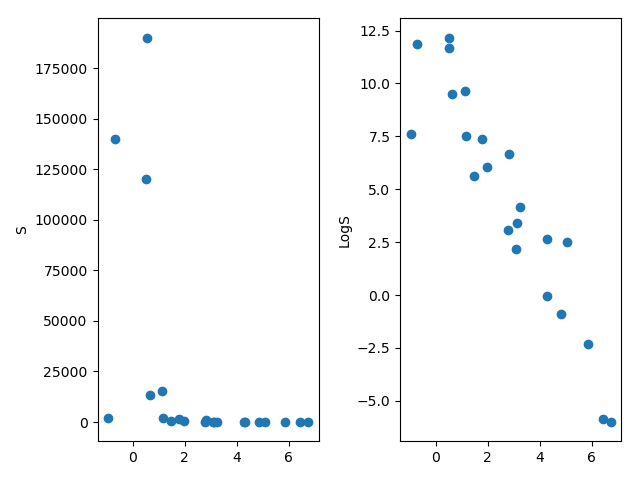

In [4]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(soldata['LogP'], soldata['Solubility S/ (mg/L)'])
ax.set_ylabel('S')
ax = fig.add_subplot(122)
ax.scatter(soldata['LogP'], soldata['LogS'])
ax.set_ylabel('LogS')
plt.tight_layout()
plt.show()

It makes sense in this case to use $Log(S)$ rather than $S$ as our descriptor. This is because the large values inherent to $S$ make the variations in the lower values of $S$ look minuscule. Chemically, this is because molecules tend to be either soluble or insoluble!

We could further verify this by studying power transforms of S.

_Characterise the relationship, and discuss how significant this relationship is. Determine the best least squares linear fit (using scikit-learn)_

<IPython.core.display.Javascript object>


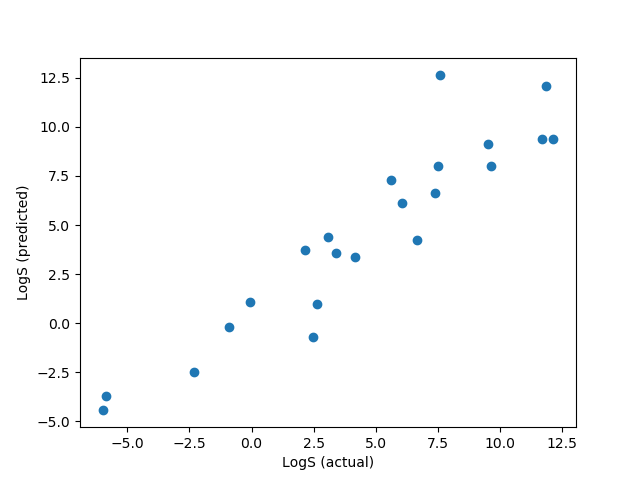

0.8670871806191248


In [12]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(np.array(soldata['LogP']).reshape([-1,1]), soldata['LogS'])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(soldata['LogS'], reg.predict(np.array(soldata['LogP']).reshape([-1,1])))
ax.set_xlabel('LogS (actual)')
ax.set_ylabel('LogS (predicted)')
plt.show()

print(reg.score(np.array(soldata['LogP']).reshape([-1,1]), soldata['LogS']))

1. _Similarly, look for a relationship between $S$ and the melting point_
    1. _Discuss what units you should use for the melting point_
    1. _Should the relationship be with $T_m$ or $\frac{1}{T_m}$? Comment and discuss_

<IPython.core.display.Javascript object>


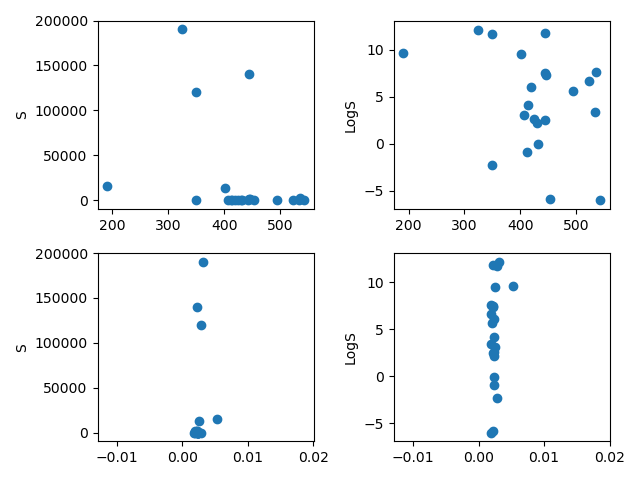

In [6]:
fig = plt.figure()
ax = fig.add_subplot(221)
ax.scatter(soldata['Melting Point / K'], soldata['Solubility S/ (mg/L)'])
ax.set_ylabel('S')
ax = fig.add_subplot(222)
ax.scatter(soldata['Melting Point / K'], soldata['LogS'])
ax.set_ylabel('LogS')
ax = fig.add_subplot(223)
ax.scatter(1/soldata['Melting Point / K'], soldata['Solubility S/ (mg/L)'])
ax.set_ylabel('S')
ax = fig.add_subplot(224)
ax.scatter(1/soldata['Melting Point / K'], soldata['LogS'])
ax.set_ylabel('LogS')
plt.tight_layout()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


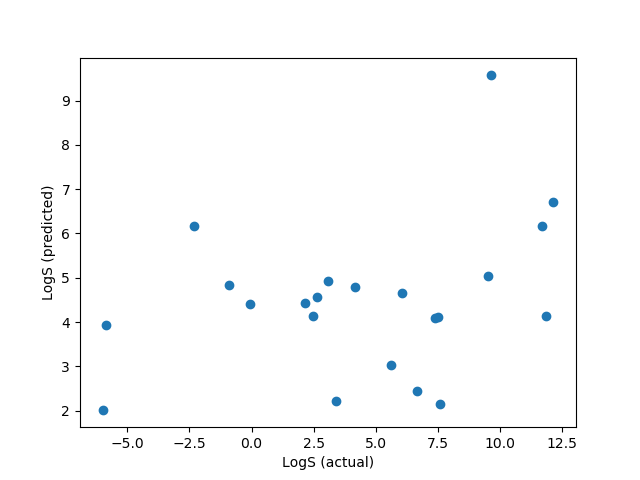

0.10523208480311164


In [17]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(np.array(soldata['Melting Point / K']).reshape([-1,1]), soldata['LogS'])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(soldata['LogS'], reg.predict(np.array(soldata['Melting Point / K']).reshape([-1,1])))
ax.set_xlabel('LogS (actual)')
ax.set_ylabel('LogS (predicted)')
plt.show()

print(reg.score(np.array(soldata['Melting Point / K']).reshape([-1,1]), soldata['LogS']))

_Investigate and discuss the nature, if any, of the correlation between $log(P)$ and $T_m$. Explain why this would be important_

<IPython.core.display.Javascript object>


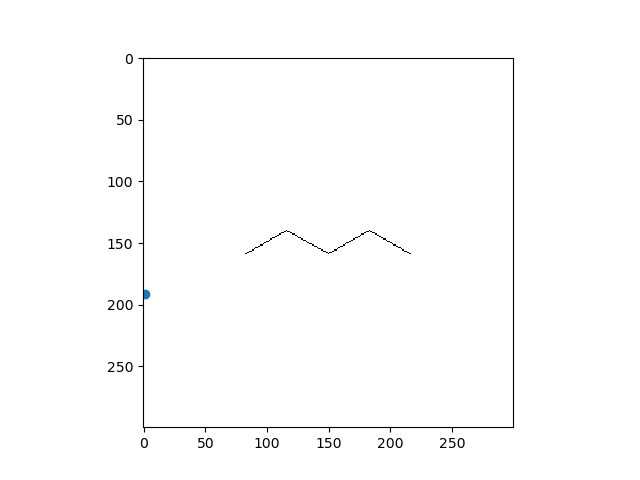

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(soldata['LogP'], soldata['Melting Point / K'])
plt.show()

<IPython.core.display.Javascript object>


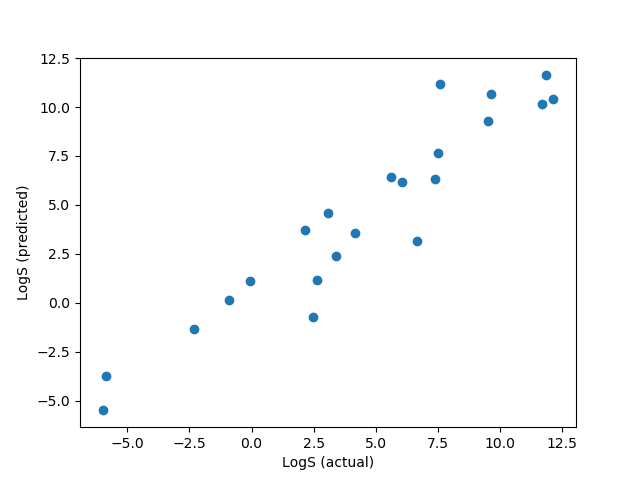

0.8968308541637562


In [34]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(np.array(soldata[['LogP','Melting Point / K']]), soldata['LogS'])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(soldata['LogS'], reg.predict(soldata[['LogP','Melting Point / K']]))
ax.set_xlabel('LogS (actual)')
ax.set_ylabel('LogS (predicted)')
plt.show()

print(reg.score(np.array(soldata[['LogP','Melting Point / K']]), soldata['LogS']))

In [42]:
from rdkit.Chem import Draw, MolFromSmiles
%matplotlib inline

def draw_molecule(SMILES):
    plt.close()
    mol = MolFromSmiles(SMILES)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    drawing = Draw.MolToImage(mol)
    ax.imshow(drawing)
    plt.show()
    

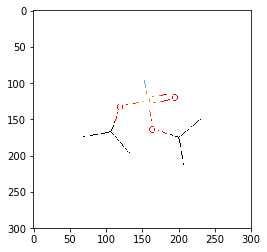

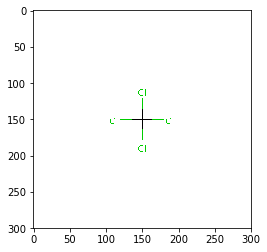

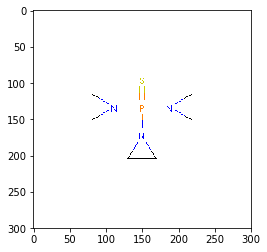

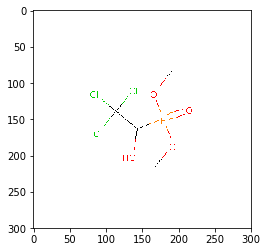

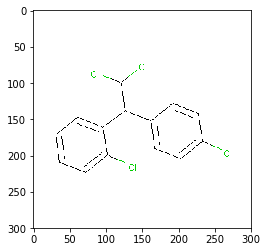

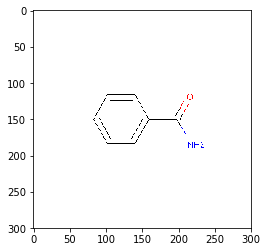

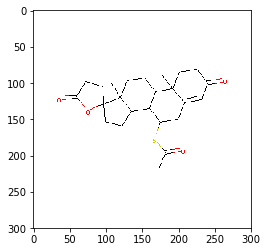

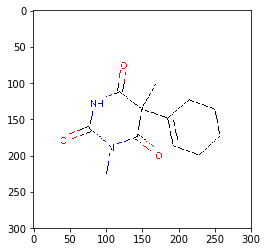

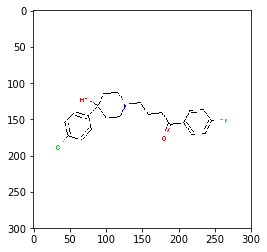

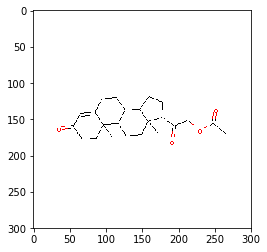

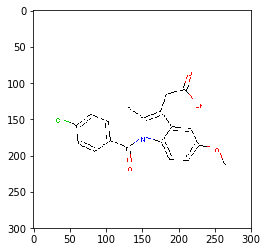

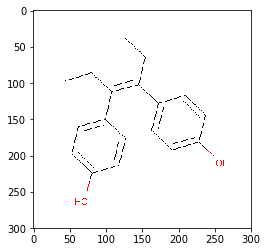

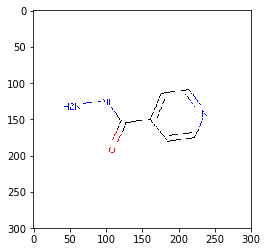

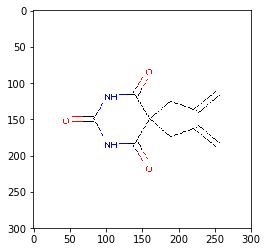

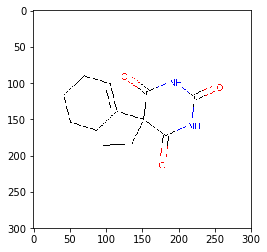

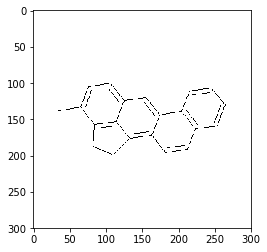

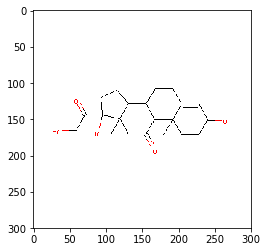

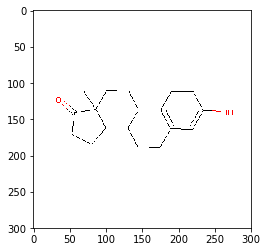

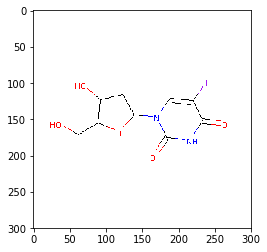

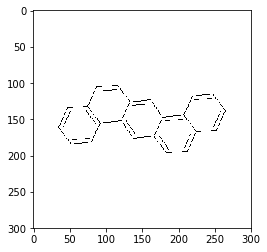

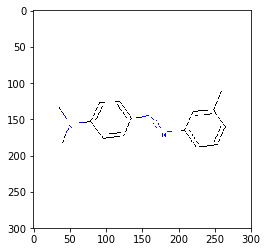

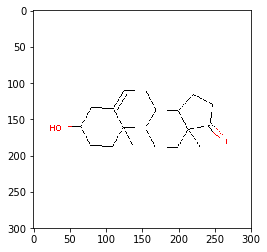

In [43]:
for smiles in soldata['SMILES']:
    draw_molecule(smiles)